>IPL STATS ANALYSIS
======

In [1]:
project_name = "ipl stats analysis"

In [2]:
!pip install jovian --upgrade -q

You should consider upgrading via the 'c:\users\garahul\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [3]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [5]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rahulgarg95/ipl-stats-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


[jovian] Committed successfully! https://jovian.ml/rahulgarg95/ipl-stats-analysis


'https://jovian.ml/rahulgarg95/ipl-stats-analysis'

Data Preparation and Cleaning
-------------

In [6]:
#Importing deliveries csv to dataframe...
#Below dataframe contains ball by ball numbers of how things when down
df_deliveries=pd.read_csv('deliveries.csv')

In [7]:
#Importing CSV with match high level details
df_matches=pd.read_csv('matches.csv')

In [8]:
!pip install xlrd

You should consider upgrading via the 'c:\users\garahul\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [9]:
#Importing CSV with Player details
df_players=pd.read_excel('Players.xlsx')

1. Analysing df_deliveries dataframe...

In [10]:
#Getting Column List
print(df_deliveries.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [11]:
#Rows Count and No of Columns
print(df_deliveries.shape)

(179078, 21)


In [12]:
print(df_deliveries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [13]:
#Checking if batsman_runs and legbye_runs occur concurrenlty
df_deliveries[(df_deliveries.batsman_runs > 0) & (df_deliveries.legbye_runs > 0)]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150519,7894,1,Mumbai Indians,Chennai Super Kings,10,5,Ishan Kishan,AS Yadav,M Wood,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
150576,7894,1,Mumbai Indians,Chennai Super Kings,20,1,HH Pandya,KH Pandya,DJ Bravo,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
150651,7894,2,Chennai Super Kings,Mumbai Indians,12,2,KM Jadhav,RA Jadeja,Mustafizur Rahman,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
150660,7894,2,Chennai Super Kings,Mumbai Indians,13,5,DJ Bravo,KM Jadhav,M Markande,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
150817,7895,1,Delhi Daredevils,Kings XI Punjab,19,1,DT Christian,CH Morris,AJ Tye,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178435,11413,1,Sunrisers Hyderabad,Delhi Capitals,16,3,V Shankar,KS Williamson,I Sharma,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
178641,11414,1,Delhi Capitals,Chennai Super Kings,9,2,SS Iyer,C Munro,RA Jadeja,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
178671,11414,1,Delhi Capitals,Chennai Super Kings,14,2,S Rutherford,RR Pant,Imran Tahir,0,...,0,4,0,0,4,4,8,NaN,NaN,NaN
178818,11414,2,Chennai Super Kings,Delhi Capitals,18,1,MS Dhoni,AT Rayudu,K Paul,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN


In [14]:
#Checking if batsman_runs and wide_runs occur concurrenlty
df_deliveries[(df_deliveries.batsman_runs > 0) & (df_deliveries.wide_runs > 0)]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150480,7894,1,Mumbai Indians,Chennai Super Kings,4,3,RG Sharma,Ishan Kishan,SR Watson,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
150561,7894,1,Mumbai Indians,Chennai Super Kings,17,5,KH Pandya,HH Pandya,M Wood,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
150637,7894,2,Chennai Super Kings,Mumbai Indians,10,1,KM Jadhav,RA Jadeja,HH Pandya,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
150672,7894,2,Chennai Super Kings,Mumbai Indians,15,5,Harbhajan Singh,DJ Bravo,MJ McClenaghan,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
150682,7894,2,Chennai Super Kings,Mumbai Indians,17,2,M Wood,DJ Bravo,HH Pandya,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178888,11415,1,Mumbai Indians,Chennai Super Kings,10,2,Ishan Kishan,AS Yadav,DJ Bravo,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
178988,11415,2,Chennai Super Kings,Mumbai Indians,6,5,SR Watson,SK Raina,SL Malinga,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
178993,11415,2,Chennai Super Kings,Mumbai Indians,7,3,SK Raina,SR Watson,MJ McClenaghan,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
179006,11415,2,Chennai Super Kings,Mumbai Indians,9,3,SR Watson,SK Raina,MJ McClenaghan,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN


In [15]:
#Checking if batsman_runs and bye_runs occur concurrenlty
df_deliveries[(df_deliveries.batsman_runs > 0) & (df_deliveries.bye_runs > 0)]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150713,7895,1,Delhi Daredevils,Kings XI Punjab,2,2,G Gambhir,C Munro,MM Sharma,0,...,1,0,0,0,1,1,2,NaN,NaN,NaN
151395,7897,2,Sunrisers Hyderabad,Rajasthan Royals,13,6,S Dhawan,KS Williamson,D Short,0,...,4,0,0,0,4,4,8,NaN,NaN,NaN
151534,7898,1,Kolkata Knight Riders,Chennai Super Kings,20,5,T Curran,AD Russell,SN Thakur,0,...,1,0,0,0,1,1,2,NaN,NaN,NaN
152856,7904,1,Rajasthan Royals,Royal Challengers Bangalore,13,6,JC Buttler,SV Samson,YS Chahal,0,...,4,0,0,0,4,4,8,NaN,NaN,NaN
152941,7904,2,Royal Challengers Bangalore,Rajasthan Royals,7,2,Q de Kock,V Kohli,S Gopal,0,...,1,0,0,0,1,1,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176461,11340,2,Rajasthan Royals,Royal Challengers Bangalore,4,1,L Livingstone,SV Samson,YS Chahal,0,...,1,0,0,0,1,1,2,NaN,NaN,NaN
177856,11346,2,Kings XI Punjab,Chennai Super Kings,16,2,N Pooran,Mandeep Singh,Imran Tahir,0,...,4,0,0,0,4,4,8,NaN,NaN,NaN
178529,11413,2,Delhi Capitals,Sunrisers Hyderabad,10,6,P Shaw,SS Iyer,Basil Thampi,0,...,1,0,0,0,1,1,2,NaN,NaN,NaN
179058,11415,2,Chennai Super Kings,Mumbai Indians,17,5,SR Watson,DJ Bravo,JJ Bumrah,0,...,1,0,0,0,1,1,2,NaN,NaN,NaN


In [16]:
#Checking if wide runs and legbye_runs occur concurrenlty
df_deliveries[(df_deliveries.wide_runs > 0) & (df_deliveries.legbye_runs > 0)]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder


In [17]:
df_deliveries.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [18]:
print(df_matches.team1.value_counts().to_dict())
print(df_matches.team2.value_counts().to_dict())

{'Mumbai Indians': 101, 'Kings XI Punjab': 91, 'Chennai Super Kings': 89, 'Royal Challengers Bangalore': 85, 'Kolkata Knight Riders': 83, 'Delhi Daredevils': 72, 'Rajasthan Royals': 67, 'Sunrisers Hyderabad': 63, 'Deccan Chargers': 43, 'Pune Warriors': 20, 'Gujarat Lions': 14, 'Rising Pune Supergiant': 8, 'Rising Pune Supergiants': 7, 'Kochi Tuskers Kerala': 7, 'Delhi Capitals': 6}
{'Kolkata Knight Riders': 95, 'Royal Challengers Bangalore': 95, 'Delhi Daredevils': 89, 'Mumbai Indians': 86, 'Kings XI Punjab': 85, 'Rajasthan Royals': 80, 'Chennai Super Kings': 75, 'Sunrisers Hyderabad': 45, 'Deccan Chargers': 32, 'Pune Warriors': 26, 'Gujarat Lions': 16, 'Delhi Capitals': 10, 'Rising Pune Supergiant': 8, 'Rising Pune Supergiants': 7, 'Kochi Tuskers Kerala': 7}


In [19]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

<AxesSubplot:>

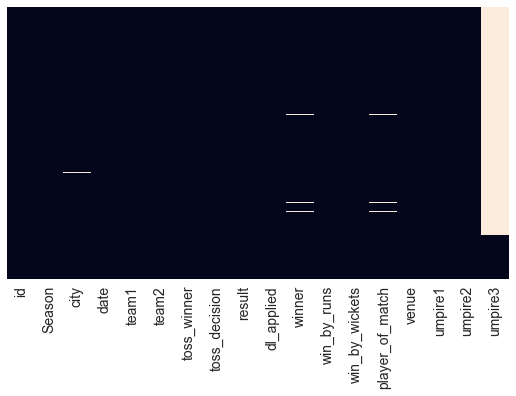

In [20]:
#Analysing Null values with Seaborn Heatmap
sns.heatmap(df_matches.isnull(),yticklabels=False,cbar=False)

#Light Colered portions shows present of null value in that column

<AxesSubplot:>

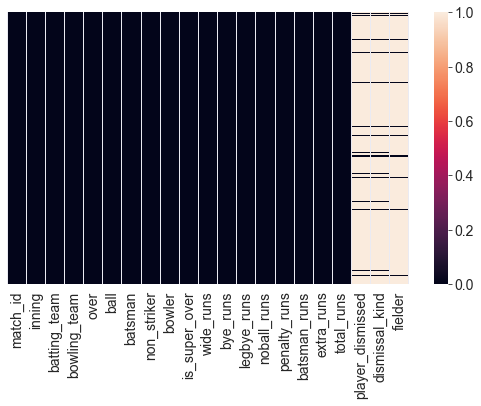

In [21]:
sns.heatmap(df_deliveries.isnull(),yticklabels=False)

In [22]:
df_matches.result.value_counts()
#Player and Winner Null Values Justified as 4 matches have no results

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [23]:
#Cheking for Missing Cities and Corrsponding Venue details
df_matches[df_matches.city.isna()]['venue']

461    Dubai International Cricket Stadium
462    Dubai International Cricket Stadium
466    Dubai International Cricket Stadium
468    Dubai International Cricket Stadium
469    Dubai International Cricket Stadium
474    Dubai International Cricket Stadium
476    Dubai International Cricket Stadium
Name: venue, dtype: object

> Data Issues Found:
>1. No Null entries found for main columns of DataFrame
>2. Issue Found: batsman_runs are not possible in case of wide_runs runs and extra's present -- Need Correction
>3. Issue Found: batsman_runs are not possible in case of bye_runs runs and extra's present -- Need Correction
>4. Issue Found: batsman_runs are not possible in case of legbye_runs runs and extra's present -- Need Correction
>5. Issue Found: Team Name issue Found in both df_deliveries and df_matches dataframe -- Need Correction
>6. Issue Found: 7 City Details Missing -- Need Correction

In [24]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rahulgarg95/ipl-stats-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


[jovian] Committed successfully! https://jovian.ml/rahulgarg95/ipl-stats-analysis


'https://jovian.ml/rahulgarg95/ipl-stats-analysis'

In [25]:
df_matches.Season.value_counts()

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2016    60
IPL-2018    60
IPL-2010    60
IPL-2019    60
IPL-2014    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

In [26]:
#Data Correction For Matches
df_matches=df_matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings','Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant'],['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'])
df_deliveries=df_deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings','Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant'],['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'])

In [27]:
df_matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [28]:
df_matches.city.value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Port Elizabeth      7
Abu Dhabi           7
Ranchi              7
Cuttack             7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [29]:
#Filling NULL matches with Dubai
df_matches['city']=df_matches.city.fillna('Dubai')

In [30]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [31]:
#Correcting the errors with runs as two exhaustive events coincide
df_deliveries.loc[(df_deliveries.wide_runs > 0) & (df_deliveries.batsman_runs > 0),"batsman_runs"] = 0
df_deliveries.loc[(df_deliveries.bye_runs > 0) & (df_deliveries.batsman_runs > 0),"batsman_runs"] = 0
df_deliveries.loc[(df_deliveries.legbye_runs > 0) & (df_deliveries.batsman_runs > 0),"batsman_runs"] = 0
df_deliveries["extra_runs"] = df_deliveries["wide_runs"]+df_deliveries["bye_runs"]+df_deliveries["legbye_runs"]+df_deliveries["noball_runs"]+df_deliveries["penalty_runs"]
df_deliveries["total_runs"]=df_deliveries["extra_runs"]+df_deliveries["batsman_runs"]

In [32]:
df_deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,CSK,MI,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,CSK,MI,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,CSK,MI,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,CSK,MI,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [33]:
jovian.commit(project=project_name,message='Data cleaning done')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rahulgarg95/ipl-stats-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


[jovian] Committed successfully! https://jovian.ml/rahulgarg95/ipl-stats-analysis


'https://jovian.ml/rahulgarg95/ipl-stats-analysis'

In [34]:
df_matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [35]:
df_merge=pd.merge(df_deliveries,df_matches,left_on='match_id',right_on='id')

In [37]:
df_merge['date']=pd.to_datetime(df_merge['date'])

In [39]:
df_merge.to_csv('tmp.csv',index=False)

In [43]:
df_overall=df_merge.groupby(['match_id','inning','Season'])[['wide_runs','noball_runs','total_runs','batsman_runs']].sum().reset_index()

In [51]:
df_overall.dtypes

match_id         int64
inning           int64
Season          object
wide_runs        int64
noball_runs      int64
total_runs       int64
batsman_runs     int64
dtype: object

In [56]:
df_overall=df_overall[(df_overall.inning == 1) | (df_overall.inning == 2)]

In [69]:
df_match_avg=df_overall.groupby(['Season','inning']).mean().reset_index()

In [71]:
df_match_avg

,Season,inning,match_id,wide_runs,noball_runs,total_runs,batsman_runs
0,IPL-2008,1,88.500000,4.931034,0.724138,160.965517,151.517241
1,IPL-2008,2,88.500000,5.344828,0.689655,148.293103,138.293103
2,IPL-2009,1,146.000000,4.403509,0.631579,150.263158,141.894737
3,IPL-2009,2,146.000000,4.754386,0.736842,136.052632,127.298246
4,IPL-2010,1,204.500000,5.816667,0.683333,164.783333,154.666667
5,IPL-2010,2,204.500000,4.833333,0.550000,149.616667,140.916667
6,IPL-2011,1,271.000000,4.452055,0.630137,152.369863,143.479452
7,IPL-2011,2,270.583333,4.430556,0.555556,139.319444,131.305556
8,IPL-2012,1,344.500000,4.283784,0.486486,157.540541,149.378378
9,IPL-2012,2,344.500000,3.945946,0.364865,145.878378,138.756757


<AxesSubplot:xlabel='Season', ylabel='total_runs'>

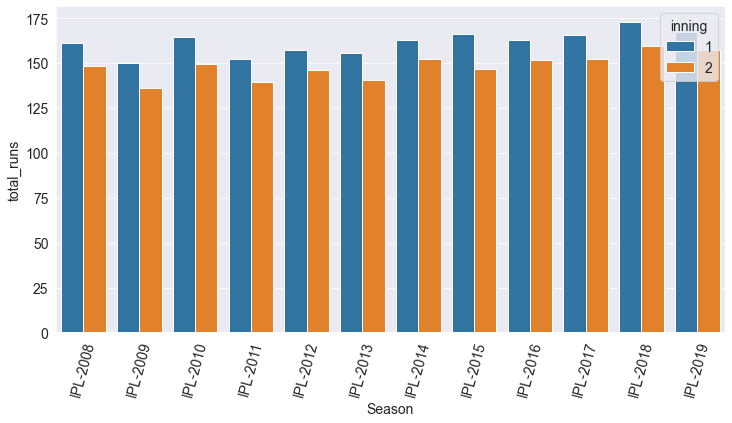

In [75]:
#Avg scores batting in first and second innings each IPL season
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.set_style('darkgrid')
sns.barplot('Season','total_runs',hue='inning',data=df_match_avg)
#Seems to be teams have adapter to 20-20 format every IPL as it progressed

<AxesSubplot:xlabel='Season', ylabel='count'>

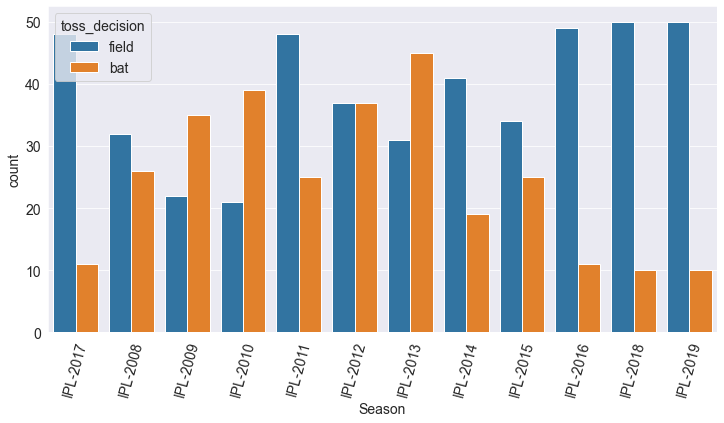

In [85]:
#Preferred toss decisions each season
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.set_style('darkgrid')
sns.countplot('Season',hue='toss_decision',data=df_matches)
#It seems teams prefer the field first in most of the IPL matches

<AxesSubplot:xlabel='Season', ylabel='total_runs'>

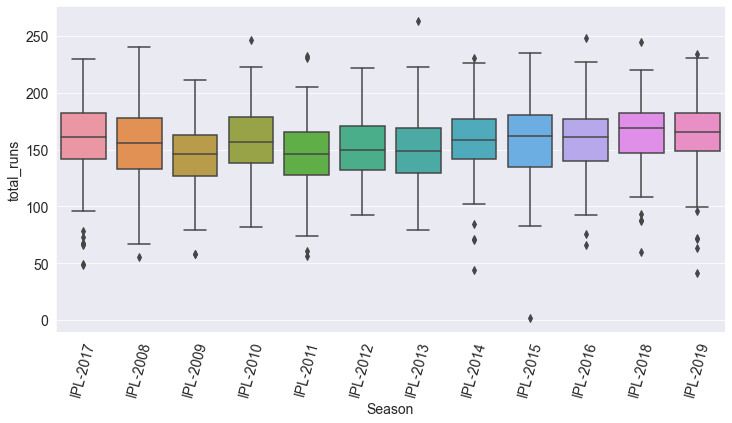

In [97]:
#Box Plot giving a better view of min,mean,max,25th and 75th percentile of runs scored each IPL
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.boxplot(df_overall['Season'],df_overall['total_runs'])

<AxesSubplot:xlabel='player_name', ylabel='counts'>

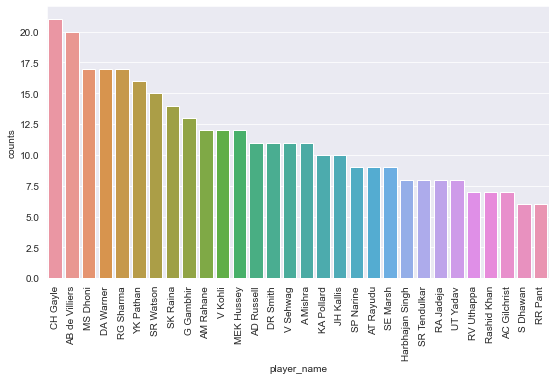

In [126]:
#Creating A DataFrame OF Man of the match Count
df_motm=df_matches.player_of_match.value_counts().rename_axis('player_name').reset_index(name='counts')
plt.xticks(rotation=90)
plt.rcParams['font.size'] = 10
sns.barplot('player_name','counts',data=df_motm.head(30))

<AxesSubplot:ylabel='dismissal_kind'>

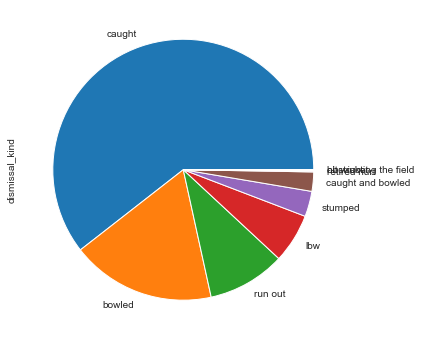

In [127]:
#Checking the type of dismisals in IPL
df_dismiss=df_merge.dismissal_kind.value_counts().rename_axis('dismissal_type')
df_dismiss.plot.pie(figsize=(6, 6))

In [ ]:
jovian.commit(project=project_name,message='Basic Visualization To get overall IPL Stats')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
